<h1>Feature Engineering</h1>
<hr>

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
#import dataset
df=pd.read_csv("project_files/cleaned_listings.csv")

<h1>Co-relations in the dataset</h1>

In [5]:
correlations = df.loc[:, ~df.columns.isin(['id'])].corr()

In [6]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

C:\Users\user\AppData\Local\Temp\ipykernel_11008\3787602548.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlations, dtype=np.bool)


<AxesSubplot:>

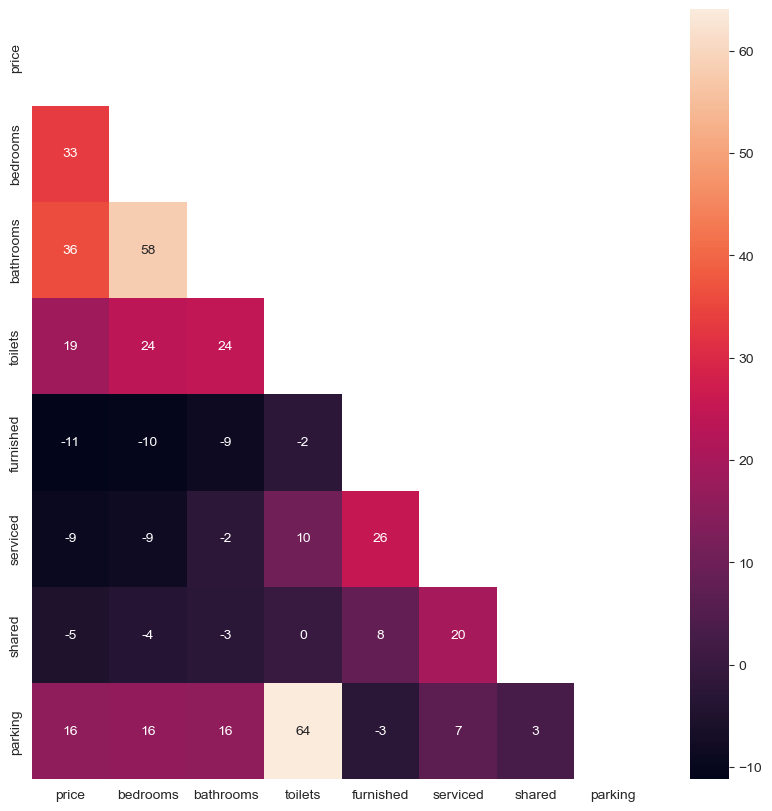

In [7]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [8]:
correlations = df.loc[(df['category']=='For Sale')].loc[:, ~df.columns.isin(['id'])].corr()

<AxesSubplot:>

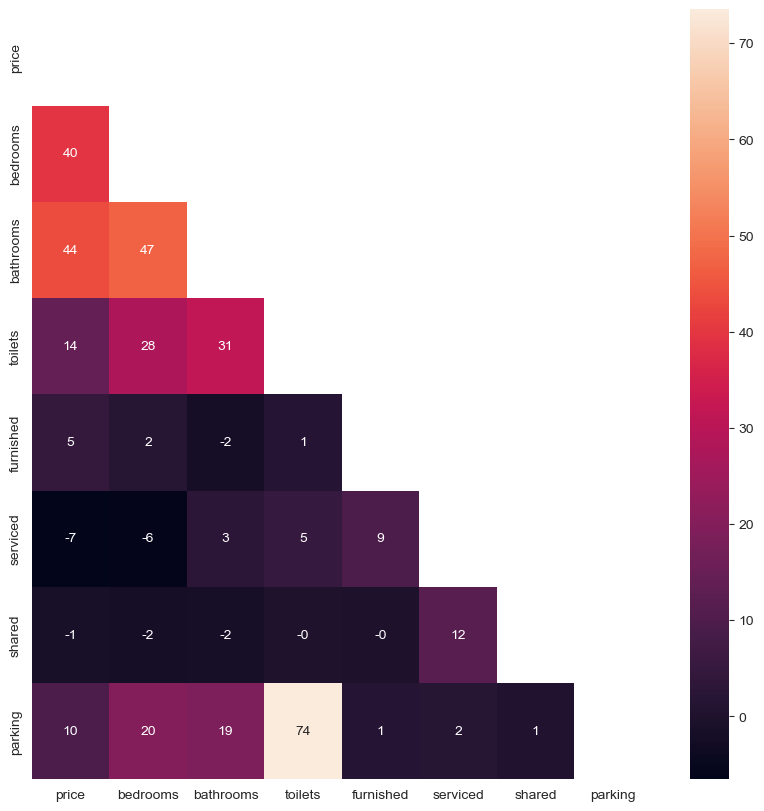

In [9]:
#correlation in properties listed for sale
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [10]:
correlations = df.loc[(df['category']=='For Rent')].loc[:, ~df.columns.isin(['id'])].corr()

<AxesSubplot:>

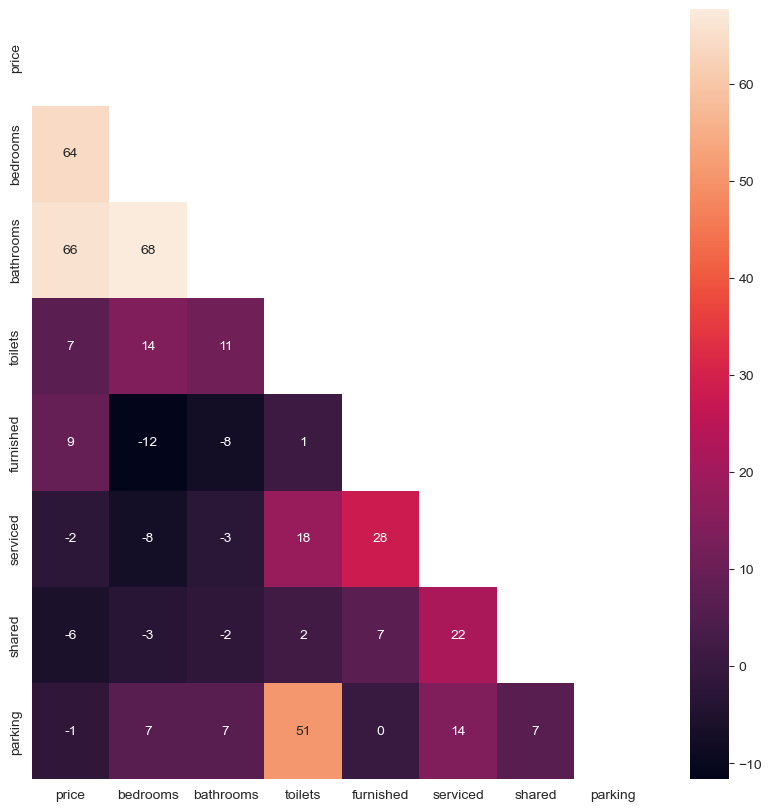

In [11]:
#correlation in properties listed for sale
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [13]:
df.shape

(6918, 15)

In [14]:
#create a value for pre covid years
# df2['pre_covid']=df[(df['listdate'] < '2020-3-12') ].astype(int)
df['pre_covid']=( (df.listdate <= "2020-3-12")).astype(int)

In [15]:
df.sort_values(by='pre_covid').tail(3)

,id,price,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,listdate,pre_covid
4505,6707,12800000.0,3,3,0.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Kilimani,2020-08-24 15:59:02,1
4498,6676,2400000.0,1,1,0.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Embakasi,2020-08-24 14:27:48,1
0,7,200000.0,5,5,5.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Nairobi Central,2020-07-18 00:00:00,1


In [16]:
df.pre_covid.mean()

0.36802544087886674

In [17]:
#convert data type listdate to date
df['listdate']= pd.to_datetime(df['listdate'])

In [18]:
df["list_year"]=df['listdate'].dt.year
df["list_month"]=df['listdate'].dt.month

In [19]:
df.drop('listdate', inplace=True, axis=1)
df.drop('id', inplace=True, axis=1)

In [20]:
df.shape

(6918, 16)

In [21]:
df.dtypes

price         float64
bedrooms        int64
bathrooms       int64
toilets       float64
furnished       int64
serviced        int64
shared          int64
parking         int64
category       object
type           object
sub_type       object
state          object
locality       object
pre_covid       int32
list_year       int64
list_month      int64
dtype: object

In [23]:
df.head(1)

,price,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,pre_covid,list_year,list_month
0,200000.0,5,5,5.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Nairobi Central,1,2020,7


In [22]:
# Save analytical table
df.to_csv('project_files/analytical_table.csv', index = False)